## Random Forest Classifier:

Random Forest Classifier is an ensemble learning method used for classification tasks in machine learning. 
 - It builds multiple decision trees during training and combines their predictions to make the final classification decision. 
 - Each decision tree is trained on a random subset of the training data (bagging) and considers only a random subset of features at each node, introducing diversity and reducing overfitting. 
 - For classification, the final prediction is made based on a majority vote among the individual decision trees. Random Forest is popular for its accuracy, versatility, and ability to handle both categorical and numerical data.

Random Forest Classifier is a powerful and widely used algorithm for fake news detection. In this context, it can be utilized to distinguish between genuine and fake news articles or headlines based on various features extracted from the text data. 

In [1]:
import pandas as pd
import numpy as np
import os, re, string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
# Used to convert a collection of raw text documents into numerical 
# features, specifically TF-IDF (Term Frequency-Inverse Document Frequency) 
# scores.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
fake = fake[:5000]
true = true[:5000]
fake['Label'] = 0
true['Label'] = 1

true["text"] = true["title"] + " " + true["text"]
fake["text"] = fake["title"] + " " + fake["text"]

true.drop(["subject", "date", "title"], axis = 1)
fake.drop(["subject", "date", "title"], axis = 1)

df = pd.concat([fake, true], ignore_index = True, sort = False)
df = shuffle(df).reset_index(drop = True)
df.head()

,title,text,subject,date,Label
0,White House says will not announce FBI directo...,White House says will not announce FBI directo...,politicsNews,"May 19, 2017",1
1,CAN’T-MISS: Bernie And Hillary MOP The FLOOR ...,CAN’T-MISS: Bernie And Hillary MOP The FLOOR ...,News,"October 2, 2016",0
2,U.S. Senate votes to overturn Obama broadband ...,U.S. Senate votes to overturn Obama broadband ...,politicsNews,"March 23, 2017",1
3,Report: Russia Probe Gets EVEN HOTTER As Inve...,Report: Russia Probe Gets EVEN HOTTER As Inve...,News,"May 30, 2017",0
4,"Senior U.S. senator pushes Trump on Russia, Fr...","Senior U.S. senator pushes Trump on Russia, Fr...",politicsNews,"May 9, 2017",1


In [3]:
del true
del fake

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Preprocessing:

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.PorterStemmer()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [stemmer.stem(word) for word in tokens if word not in stopwords]
    return text

In [5]:
X = df[['text', 'body_len', 'punct%']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,53934,53935,53936,53937,53938,53939,53940,53941,53942,53943
0,1998,2.3,0.008947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,740,2.3,0.019814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1624,3.5,0.011215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3974,5.0,0.005777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2161,2.8,0.011725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training of Model:

Precision: 99.95 %
Recall: 99.105 %
F1-Score: 99.526 %
Accuracy: 99.525 %


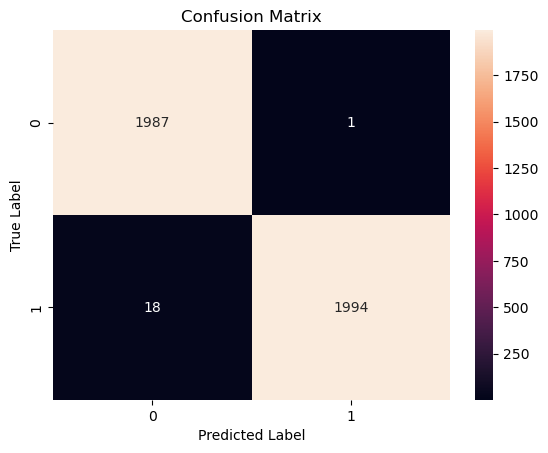

In [6]:
rf = RandomForestClassifier(n_estimators = 150, max_depth = None, n_jobs = -1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label = 1, average = 'binary')
print('Precision: {} %'.format(round(precision*100, 3)))
print('Recall: {} %'.format(round(recall*100, 3)))
print('F1-Score: {} %'.format(round(fscore*100, 3)))
print('Accuracy: {} %'.format(round(acs(y_test,y_pred)*100, 3)))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()